In [ ]:
# !pip install nome_biblioteca 

In [ ]:
# !pip install unidecode

     |████████████████████████████████| 235 kB 26.3 MB/s 


# 1. Importando bibliotecas

In [ ]:
print('Lendo Bibliotecas...')

In [ ]:
import pandas as pd
from unidecode import unidecode

# 2. Leitura de Arquivos

In [ ]:
print('Lendo arquivos...')

## 2.1. Arquivos CSV (ou TXT)

pd.read_csv(str, sep = str, skiprows = int, encoding = str, dtype = dict)

1. str = nome do arquivo + extensão
2. str = separador de dados dentro do arquivo
3. int = número de linhas a serem puladas
4. str = arquivos txt (ANSI) -> 'latin-1', arquivos csv(UTF-8) -> 'utf-8'
5. dict = {0:'str', 1:'float'}


In [ ]:
df_endereco = pd.read_csv('endereco.txt', sep = '|', skiprows = 3, encoding = 'latin-1', dtype = {1:'str'})

In [ ]:
df_status = pd.read_csv('pedidos.txt', sep = '|', skiprows = 3, encoding = 'latin-1', dtype = {1:'str'})

In [ ]:
df_vendas = pd.read_csv('vendas.txt', sep = '|', skiprows = 3, encoding = 'latin-1', dtype = {1:'str',2:'str',5:'str'})

## 2.2 Arquivos Excel (XLSX)

pd.read_excel(str, sheet_name = int, dtype = dict)

1. str = nome do arquivo + extensão
2. int = index da aba do excel
3. dict = {0:'str', 1:'float'}

In [ ]:
df_grupos = pd.read_excel('grupos_merc.xlsx', sheet_name = 0, dtype = {0:'str'})

# 3. Visualização de DataFrames

.head(int) 

int > 0: primeiras linhas do dataframe
int < 0: todas as linhas exceto as últimas

.tail(int)

int > 0: últimas linhas do dataframe
int < 0: todas as linhas exceto as primeiras


In [ ]:
df_endereco.head(2)

,Unnamed: 0,Ped BOL,Bairro,Rg,Unnamed: 4
0,----------------------------------------------...,NaN,NaN,NaN,NaN
1,NaN,900000000550488,FLORES,AM,NaN


In [ ]:
df_endereco.tail(3)

,Unnamed: 0,Ped BOL,Bairro,Rg,Unnamed: 4
37307,NaN,900000001317024,NOVA CIDADE,AM,NaN
37308,NaN,900000001317024,TARUMA,AM,NaN
37309,----------------------------------------------...,NaN,NaN,NaN,NaN


In [ ]:
df_endereco.head(-3)

,Unnamed: 0,Ped BOL,Bairro,Rg,Unnamed: 4
0,----------------------------------------------...,NaN,NaN,NaN,NaN
1,NaN,900000000550488,FLORES,AM,NaN
2,NaN,900000000550488,FLORES,AM,NaN
3,NaN,900000000550588,CIDADE NOVA,AM,NaN
4,NaN,900000000550588,CIDADE NOVA,AM,NaN
...,...,...,...,...,...
37302,NaN,900000001316962,DOM PEDRO I,AM,NaN
37303,NaN,900000001316974,ZUMBI DOS PALMARES,AM,NaN
37304,NaN,900000001316974,ZUMBI DOS PALMARES,AM,NaN
37305,NaN,900000001316980,CIDADE NOVA,AM,NaN


[intervalo de linas, intervalo de colunas]

.loc[linha inicial: linha final, coluna inicial: coluna final]




.iloc[index inicial: index final + 1, index inicial: index final + 1]

In [ ]:
df_endereco.columns

Index(['Unnamed: 0', '        Ped BOL',
       'Bairro                                  ', 'Rg', 'Unnamed: 4'],
      dtype='object')

In [ ]:
df_endereco.loc[3:6,'        Ped BOL':'Bairro                                  ']

,Ped BOL,Bairro
3,900000000550588,CIDADE NOVA
4,900000000550588,CIDADE NOVA
5,900000000550646,ADRIANOPOLIS
6,900000000550646,ADRIANOPOLIS


In [ ]:
df_endereco.iloc[3:7,1:3]

,Ped BOL,Bairro
3,900000000550588,CIDADE NOVA
4,900000000550588,CIDADE NOVA
5,900000000550646,ADRIANOPOLIS
6,900000000550646,ADRIANOPOLIS


df[nome da coluna][nome da linha]

In [ ]:
df_endereco['Bairro                                  '][37308]

'TARUMA                                  '

In [ ]:
df_endereco

,Unnamed: 0,Ped BOL,Bairro,Rg,Unnamed: 4
0,----------------------------------------------...,NaN,NaN,NaN,NaN
1,NaN,900000000550488,FLORES,AM,NaN
2,NaN,900000000550488,FLORES,AM,NaN
3,NaN,900000000550588,CIDADE NOVA,AM,NaN
4,NaN,900000000550588,CIDADE NOVA,AM,NaN
...,...,...,...,...,...
37305,NaN,900000001316980,CIDADE NOVA,AM,NaN
37306,NaN,900000001316980,CIDADE NOVA,AM,NaN
37307,NaN,900000001317024,NOVA CIDADE,AM,NaN
37308,NaN,900000001317024,TARUMA,AM,NaN


# 4. Tratamento de Dados

In [ ]:
print('Iniciando tratamento de dados...')

## 4.1. Renomeando Colunas

### 4.1.1. Função Rename

df.rename(columns=dict)

1. dict = {'nome_coluna1':'nome_novo1', 'nome_coluna2':'nome_novo2'}

In [ ]:
df_endereco.columns

Index(['Unnamed: 0', '        Ped BOL',
       'Bairro                                  ', 'Rg', 'Unnamed: 4'],
      dtype='object')

In [ ]:
df_endereco = df_endereco.rename(columns={'        Ped BOL':'ped_bol',
                            'Bairro                                  ':'bairro',
                            'Rg':'rg'})

In [ ]:
df_endereco['ped_bol'][1]

'900000000550488'

### 4.1.2. Método .columns

df.columns = list

1. list = lista com todos os novos nomes das colunas

In [ ]:
df_status.columns = ['Unnamed: 0','ped_bol','dt_pedido','status_ped','Unnamed: 4']

### 4.1.3. Método .columns (automatizado)

df.columns = list comprehention

list comprehention

[opereacao for var in list]

In [ ]:
lista = [1, 3, 5, 7, 9]

In [ ]:
[var+1 for var in lista]

[2, 4, 6, 8, 10]

In [ ]:
'        Ped BOL'.strip().lower().replace(' ','_')

'ped_bol'

In [ ]:
'grp.merc.'.replace('.',' ').strip().lower().replace(' ','_')

'grp_merc'

In [ ]:
df_vendas.columns = [var.replace('.',' ').strip().lower().replace(' ','_') for var in df_vendas.columns]

In [ ]:
df_grupos.columns = ['grp_merc','descricao']

## 4.2. Eliminando colunas

### 4.2.1. Função drop

df.drop(list, axis = int)

1. list = nomes das linhas ou colunas a serem deletadas
2. int = 1 -> colunas, 0 -> linhas


In [ ]:
df_endereco.drop([0,3], axis = 0).head()

,Unnamed: 0,ped_bol,bairro,rg,Unnamed: 4
1,NaN,900000000550488,FLORES,AM,NaN
2,NaN,900000000550488,FLORES,AM,NaN
4,NaN,900000000550588,CIDADE NOVA,AM,NaN
5,NaN,900000000550646,ADRIANOPOLIS,AM,NaN
6,NaN,900000000550646,ADRIANOPOLIS,AM,NaN


In [ ]:
df_endereco = df_endereco.drop(['Unnamed: 0','Unnamed: 4'], axis = 1)

### 4.2.2. Método de Seleção

df = df[list].copy()

1. list = lista de colunas a manter

In [ ]:
df_status = df_status[['ped_bol','dt_pedido','status_ped']].copy()

### 4.2.3. dropna

df.dropna(axis=int, subset=list)

1. int = 1 -> colunas, 0 -> linhas
2. list = lista de colunas referencia

In [ ]:
df_vendas = df_vendas.dropna(axis=0, subset=['ped_bol'])

In [ ]:
df_vendas.head()

,unnamed:_0,ped_bol,material,quantidade,montante,grp_merc,unnamed:_6
1,NaN,900000000550488,205792,"1,000","169,00",134001001,NaN
2,NaN,900000000550588,205792,"1,000","169,00",134001001,NaN
3,NaN,900000000550646,205791,"3,000","417,00",134001001,NaN
4,NaN,900000000550648,205792,"1,000","169,00",134001001,NaN
5,NaN,900000000550841,205792,"1,000","169,00",134001001,NaN


In [ ]:
df_vendas = df_vendas.dropna(axis=1)

In [ ]:
df_vendas.head()

,ped_bol,material,quantidade,montante,grp_merc
1,900000000550488,205792,"1,000","169,00",134001001
2,900000000550588,205792,"1,000","169,00",134001001
3,900000000550646,205791,"3,000","417,00",134001001
4,900000000550648,205792,"1,000","169,00",134001001
5,900000000550841,205792,"1,000","169,00",134001001


In [ ]:
df_status = df_status.dropna(axis=0,subset=['ped_bol'])

In [ ]:
df_endereco = df_endereco.dropna(axis=0,subset=['ped_bol'])

In [ ]:
df_endereco.head()

,ped_bol,bairro,rg
1,900000000550488,FLORES,AM
2,900000000550488,FLORES,AM
3,900000000550588,CIDADE NOVA,AM
4,900000000550588,CIDADE NOVA,AM
5,900000000550646,ADRIANOPOLIS,AM


## 4.3. Tratar e Alterar Tipos de Colunas

Verificar tipos:

df.dtypes

In [ ]:
df_grupos.dtypes

grp_merc     object
descricao    object
dtype: object

Checar espaços em strings:

df[coluna].unique()

In [ ]:
df_grupos['grp_merc'].unique()

array(['133', '133001', '133001001', '133001002', '133001003', '133002',
       '133002001', '133002002', '134', '134001', '134001001',
       '134001002', '134001003', '134001004', '134001005', '134001006',
       '134001007', '134002', '134002001', '134002002', '134002003',
       '134002004', '134002005', '134003', '134003001', '134003002',
       '134003003', '134003004', '134003005', '134003006', '134004',
       '134004001', '134004002', '134004003', '134005', '134005001',
       '134005002', '134005003', '134005004', '134005005', '134005006'],
      dtype=object)

In [ ]:
df_grupos['descricao'].unique()

array(['PET SHOP', 'UTILIDADES CÃES E GATOS', 'ACESSÓRIOS PARA PET',
       'HIGIENE E BELEZA PARA PET', 'TRANSPORTE PARA PET',
       'ALIMENTOS PET', 'ALIMENTOS P/ CÃES', 'ALIMENTOS P/ GATOS',
       'CONVENIÊNCIA', 'ALIMENTOS', 'ALIMENTOS BÁSICOS', 'CAFÉ DA MANHÃ',
       'CESTA BÁSICA', 'ENLATADOS', 'LANCHE', 'TEMPEROS E CONDIMENTOS',
       'CESTAS ESPECIAIS', 'BEBIDAS', 'ACHOCOLATADOS', 'ÁGUA', 'CERVEJAS',
       'REFRIGERANTES', 'SUCOS', 'LIMPEZA', 'UTENSÍLIOS DE LIMPEZA',
       'LIMPEZA PESADA', 'LIMPEZA DE COZINHA', 'LIMPEZA DE ROUPAS',
       'LIMPEZA DE CHÃO E SUPERFÍCIE', 'CESTA DE LIMPEZA', 'UTILIDADES',
       'UTILIDADES 1', 'DESCARTÁVEIS', 'INSETICIDA', 'HIGIENE PESSOAL',
       'BANHO', 'HIGIENE BUCAL', 'GERIÁTRICO', 'HIGIENE INFANTIL',
       'HIGIENE FEMININA', 'HIGIENE MASCULINA'], dtype=object)

In [ ]:
df_vendas.dtypes

ped_bol       object
material      object
quantidade    object
montante      object
grp_merc      object
dtype: object

In [ ]:
df_vendas['ped_bol'].unique()

array(['900000000550488', '900000000550588', '900000000550646', ...,
       '900000001316974', '900000001316980', '900000001317024'],
      dtype=object)

In [ ]:
df_vendas['ped_bol'] = df_vendas['ped_bol'].str.strip()

In [ ]:
df_vendas['material'].unique()

array(['205792  ', '205791  ', '205790  ', '205689  ', '205690  ',
       '205767  ', '205870  ', '205884  ', '205931  ', '205871  ',
       '205872  ', '205874  ', '205869  ', '205876  ', '205883  ',
       '205877  ', '205882  ', '205878  ', '205875  ', '205880  ',
       '205873  ', '205891  ', '205892  ', '205881  ', '205895  ',
       '205885  ', '205853  ', '205899  ', '205897  ', '205860  ',
       '205856  ', '205896  ', '205879  ', '205855  ', '205901  ',
       '205854  ', '205893  ', '205911  ', '205949  ', '205945  ',
       '205921  ', '205962  ', '205898  ', '205947  ', '205952  ',
       '205958  ', '205955  ', '205915  ', '205964  ', '205961  ',
       '205956  ', '205957  ', '205918  ', '205942  ', '205975  ',
       '205971  ', '205974  ', '205963  ', '205973  ', '205894  ',
       '205902  ', '205900  ', '205912  ', '205959  ', '205919  ',
       '205920  ', '205951  ', '205917  ', '205943  ', '205972  ',
       '205913  ', '205960  ', '205954  ', '205916  ', '205946

In [ ]:
df_vendas['material'] = df_vendas['material'].str.strip()

In [ ]:
df_vendas['material'].unique()

array(['205792', '205791', '205790', '205689', '205690', '205767',
       '205870', '205884', '205931', '205871', '205872', '205874',
       '205869', '205876', '205883', '205877', '205882', '205878',
       '205875', '205880', '205873', '205891', '205892', '205881',
       '205895', '205885', '205853', '205899', '205897', '205860',
       '205856', '205896', '205879', '205855', '205901', '205854',
       '205893', '205911', '205949', '205945', '205921', '205962',
       '205898', '205947', '205952', '205958', '205955', '205915',
       '205964', '205961', '205956', '205957', '205918', '205942',
       '205975', '205971', '205974', '205963', '205973', '205894',
       '205902', '205900', '205912', '205959', '205919', '205920',
       '205951', '205917', '205943', '205972', '205913', '205960',
       '205954', '205916', '205946', '205981', '205950', '205843',
       '205889', '205845', '205888', '205887', '205914', '206071',
       '205890', '206062', '206063', '206009', '206112', '2060

In [ ]:
int(float('1.001,000'.replace('.','').replace(',','.')))

1001

In [ ]:
df_vendas['quantidade'] = df_vendas['quantidade'].str.replace('.','').str.replace(',','.').astype(float).astype(int)

In [ ]:
df_vendas['montante'] = df_vendas['montante'].str.replace('.','').str.replace(',','.').astype(float)

In [ ]:
df_vendas['grp_merc'].unique()

array(['134001001', '134001003', '134001002', '134004001', '134003004',
       '134003002', '134003005', '134004003', '134003003', '134001005',
       '134003001', '134002005', '134001004', '134001006', '134001007',
       '134004002', '134003006', '133002001', '133002002', '134002002',
       '134002001', '134002004', '134005005', '134005006', '134005002',
       '134005004', '134005001'], dtype=object)

In [ ]:
df_status.dtypes

ped_bol       object
dt_pedido     object
status_ped    object
dtype: object

In [ ]:
df_status['ped_bol'].unique()

array(['900000000550488', '900000000550588', '900000000550646', ...,
       '900000001316974', '900000001316980', '900000001317024'],
      dtype=object)

In [ ]:
df_status['ped_bol'] = df_status['ped_bol'].str.strip()

In [ ]:
df_status['status_ped'].unique()

array(['3D        ', '4B        ', '3B        ', '3F        ',
       '3A        ', '4C        ', '3C        ', '3E        ',
       '2I        ', '3G        ', '2D        '], dtype=object)

In [ ]:
df_status['status_ped'] = df_status['status_ped'].str.strip()

Tipo Data:

pd.to_datetime(df['coluna'], format = string)

1. string = formato da data na string

%d: dia
%m: mês
%Y: ano



In [ ]:
df_status['dt_pedido'] = pd.to_datetime(df_status['dt_pedido'], format='%d.%m.%Y')

In [ ]:
df_status.dtypes

ped_bol               object
dt_pedido     datetime64[ns]
status_ped            object
dtype: object

In [ ]:
df_endereco.dtypes

ped_bol    object
bairro     object
rg         object
dtype: object

In [ ]:
df_endereco['ped_bol'] = df_endereco['ped_bol'].str.strip()

In [ ]:
df_endereco['rg'].unique()

array(['AM', 'RR', 'SP', 'RO', 'AC', 'CE', 'DF', 'SC', 'PA', 'BA', 'RN',
       'RJ', 'PR', 'GO', 'MA', 'MG', 'MT', 'PE', 'RS', 'PB'], dtype=object)

In [ ]:
unidecode('Alto de Nazaré.                         ').upper().strip().replace('.','')

'ALTO DE NAZARE'

In [ ]:
# def nome_funcao(parametro):
#   valor = ação
#   return valor

Aplicar uma função a uma coluna:

df['coluna'].apply(nome_funcao)



In [ ]:
def padronizar_bairro(bairro):
  valor = unidecode(bairro).upper().strip().replace('.','')
  return valor

In [ ]:
df_endereco['bairro'] = df_endereco['bairro'].apply(padronizar_bairro)

# 5. Modelagem de Dados

## 5.1. Eliminando linhas duplicadas

df.drop_duplicates(subset = list, keep = string)

1. list: colunas referencias para identificar duplicados
2. keep: 'first' -> manter a primeira aparição / 'last'-> manter a última aparição

In [ ]:
df_endereco = df_endereco.drop_duplicates(subset = ['ped_bol'], keep = 'last')

In [ ]:
df_endereco['ped_bol'].value_counts()

900000000913555    1
900000001293374    1
900000000813411    1
900000000668698    1
900000000627375    1
                  ..
900000000901961    1
900000001114295    1
900000000850248    1
900000000735784    1
900000000715703    1
Name: ped_bol, Length: 18654, dtype: int64

## 5.2. Filtros

df[condicao].copy()
df[(condicao1) operador lógica (condicao2)].copy()

operador logico: and (&), or (|), not (~)
condicao: ==, !=, >=, >, <=, <

In [ ]:
df_status = df_status[(df_status['status_ped']!='4A')&(df_status['status_ped']!='4B')].copy()

## 5.3. Agrupamento de Dados (Groupby)

df.groupby(list).agg(dict).reset_index()

1. lis: grupo de colunas a se manter valores únicos
2. dict: operações com colunas a se manter

operacoes: 'sum', 'count', 'max', 'min', 'mean', 'median', 'first', 'last'

In [ ]:
df_vendas = df_vendas.groupby(['ped_bol','grp_merc']).agg({'quantidade':'sum','montante':'sum'}).reset_index()

In [ ]:
df_vendas[df_vendas['ped_bol']=='900000001316980']

,ped_bol,grp_merc,quantidade,montante
28976,900000001316980,134001001,10,75.30
28977,900000001316980,134001002,3,12.45
28978,900000001316980,134001005,5,9.65
28979,900000001316980,134001006,6,34.20


# 6. Manipulação de Dados

In [ ]:
print('Gerando Relatório...')

In [ ]:
df_status.head(3)

,ped_bol,dt_pedido,status_ped
1,900000000550488,2020-03-25,3D
2,900000000550588,2020-03-25,3D
3,900000000550646,2020-03-25,3D


In [ ]:
df_endereco.head(3)

,ped_bol,bairro,rg
2,900000000550488,FLORES,AM
4,900000000550588,CIDADE NOVA,AM
6,900000000550646,ADRIANOPOLIS,AM


In [ ]:
df_vendas.head(3)

,ped_bol,grp_merc,quantidade,montante
0,900000000550488,134001001,1,169.0
1,900000000550588,134001001,1,169.0
2,900000000550646,134001001,3,417.0


In [ ]:
df_grupos.head(3)

,grp_merc,descricao
0,133,PET SHOP
1,133001,UTILIDADES CÃES E GATOS
2,133001001,ACESSÓRIOS PARA PET


## 6.1. Unir Tabelas (Merge)

pd.merge(df1, df2, on = list, how = str)

1. d1: dataframe da esquerda (left) 
2. d2: dataframe da direita (right)
3. list: lista de colunas em comum entre os dois dataframes
4. str: 'left' prioriza o dataframe da esquerda / 'right' prioriza o dataframe da direita / 'inner' retorna os valores em comum entre as tabelas / 'outer' retorna todos os dados de ambas as tabelas

In [ ]:
dict_valor = {
    'material': ['fogão','cama','sofá','video game'],
    'valor':[400, 850, 520, 1580]
}

In [ ]:
dict_quantidade = {
    'material': ['lampada','cama','sofá','notebook'],
    'quantidade':[5, 2, 1, 2]
}

In [ ]:
df1 = pd.DataFrame(dict_valor)

In [ ]:
df2 = pd.DataFrame(dict_quantidade)

In [ ]:
df1

,material,valor
0,fogão,400
1,cama,850
2,sofá,520
3,video game,1580


In [ ]:
df2

,material,quantidade
0,lampada,5
1,cama,2
2,sofá,1
3,notebook,2


In [ ]:
# left

In [ ]:
pd.merge(df1, df2, on = ['material'], how = 'left')

,material,valor,quantidade
0,fogão,400,NaN
1,cama,850,2.0
2,sofá,520,1.0
3,video game,1580,NaN


In [ ]:
# right

In [ ]:
pd.merge(df1, df2, on = ['material'], how = 'right')

,material,valor,quantidade
0,lampada,NaN,5
1,cama,850.0,2
2,sofá,520.0,1
3,notebook,NaN,2


In [ ]:
# inner

In [ ]:
pd.merge(df1, df2, on = ['material'], how = 'inner')

,material,valor,quantidade
0,cama,850,2
1,sofá,520,1


In [ ]:
# outer

In [ ]:
pd.merge(df1, df2, on = ['material'], how = 'outer')

,material,valor,quantidade
0,fogão,400.0,NaN
1,cama,850.0,2.0
2,sofá,520.0,1.0
3,video game,1580.0,NaN
4,lampada,NaN,5.0
5,notebook,NaN,2.0


In [ ]:
df_dados = pd.merge(df_status, df_endereco, on = ['ped_bol'], how = 'left')

In [ ]:
df_dados = pd.merge(df_dados, df_vendas, on = ['ped_bol'], how = 'left')

In [ ]:
df_dados = pd.merge(df_dados, df_grupos, on = ['grp_merc'], how = 'left')

In [ ]:
df_dados.head(2)

,ped_bol,dt_pedido,status_ped,bairro,rg,grp_merc,quantidade,montante,descricao
0,900000000550488,2020-03-25,3D,FLORES,AM,134001001,1,169.0,ALIMENTOS BÁSICOS
1,900000000550588,2020-03-25,3D,CIDADE NOVA,AM,134001001,1,169.0,ALIMENTOS BÁSICOS


## 6.2. Identificando Outliers

In [ ]:
df_dados['montante'].describe()

count    25952.000000
mean       112.912573
std        187.844763
min          0.990000
25%         15.600000
50%        104.000000
75%        174.000000
max      18720.000000
Name: montante, dtype: float64

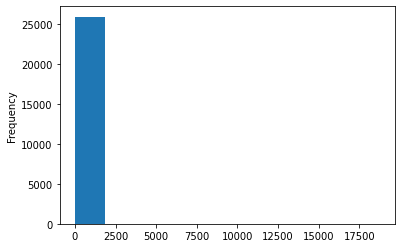

In [ ]:
df_dados['montante'].plot.hist()

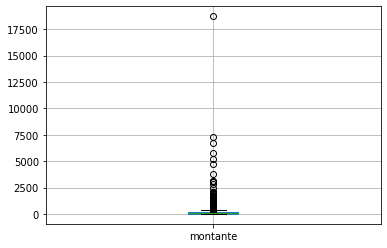

In [ ]:
df_dados.boxplot(column='montante')

In [ ]:
df_dados[df_dados['montante']==18720]

,ped_bol,dt_pedido,status_ped,bairro,rg,grp_merc,quantidade,montante,descricao
6053,900000000716524,2020-04-28,3D,DOM PEDRO I,AM,134001003,200,18720.0,CESTA BÁSICA


In [ ]:
df_dados = df_dados[df_dados['montante']<2500].copy()

## 6.3. Gerando as visões de negócio

### 6.3.1. Visão por Estado

In [ ]:
df_estado = df_dados.groupby(['rg']).agg({'montante':'sum'}).reset_index()

Ordenando valores

df.sort_values(list, ascending = list)

1. list: lista de colunas a ordenar
2. list: lista de booleanos: True -> ordena do menor para o maior / False -> ordena do maior para o menor

In [ ]:
df_estado = df_estado.sort_values(['montante'], ascending = [False])

In [ ]:
valor_total = df_estado['montante'].sum()

In [ ]:
df_estado['montante_perc'] = (df_estado['montante']/valor_total)*100

In [ ]:
df_estado['montante_perc'] = df_estado['montante_perc'].round(2)

In [ ]:
df_estado.head()

,rg,montante,montante_perc
1,AM,2792505.15,97.43
14,RR,60844.28,2.12
13,RO,4130.77,0.14
16,SP,2293.22,0.08
5,MG,1038.37,0.04


### 6.3.2. Visão por Bairro

In [ ]:
df_bairros = df_dados.groupby(['rg','bairro']).agg({'montante':'sum'}).reset_index()

In [ ]:
df_temp = df_bairros[df_bairros['rg']=='SP'].copy()

In [ ]:
df_temp = df_temp.sort_values('montante',ascending=False)

In [ ]:
df_temp1 = df_temp.head(10).copy()

In [ ]:
df_temp2 = df_temp.tail(-10).copy()

In [ ]:
df_temp2['bairro'] = 'OUTROS'

In [ ]:
df_temp2 = df_temp2.groupby(['rg','bairro']).agg({'montante':'sum'}).reset_index()

In [ ]:
df_temp1

,rg,bairro,montante
464,SP,CENTRO,475.36
462,SP,BAIRRO DO LAGO,418.00
469,SP,PANORAMA (POLVILHO),314.24
467,SP,CIDADE SAO PEDRO - GLEBA B,237.24
463,SP,BARRINHA,210.56
465,SP,CIBRATEL,159.44
470,SP,VILA AMERICO,117.28
472,SP,VILA ZANETTI,117.28
471,SP,VILA MATIAS,99.23
468,SP,LOTEAMENTO ALDROVANDIA GLEBA 2,55.07


In [ ]:
df_temp2

,rg,bairro,montante
0,SP,OUTROS,89.52


Unir duas tabelas iguais (concat)

pd.concat(list)

1. list: lista de dataframes a serem unidos

In [ ]:
df_temp = pd.concat([df_temp1,df_temp2])

In [ ]:
valor_total = df_temp['montante'].sum()

In [ ]:
df_temp['montante_perc'] = (df_temp['montante']/valor_total)*100

In [ ]:
df_temp['montante_perc'] = df_temp['montante_perc'].round(2)

In [ ]:
df_temp = df_temp.reset_index(drop=True)

In [ ]:
df_temp

,rg,bairro,montante,montante_perc
0,SP,CENTRO,475.36,20.73
1,SP,BAIRRO DO LAGO,418.00,18.23
2,SP,PANORAMA (POLVILHO),314.24,13.70
3,SP,CIDADE SAO PEDRO - GLEBA B,237.24,10.35
4,SP,BARRINHA,210.56,9.18
5,SP,CIBRATEL,159.44,6.95
6,SP,VILA AMERICO,117.28,5.11
7,SP,VILA ZANETTI,117.28,5.11
8,SP,VILA MATIAS,99.23,4.33
9,SP,LOTEAMENTO ALDROVANDIA GLEBA 2,55.07,2.40


In [ ]:
# Exemplo Estrutura de Repetição

In [ ]:
lista = [1,3,5,7,9]

In [ ]:
for i in lista:
  s = i+1
  print(s)

2
4
6
8
10


In [ ]:
# Aplicando no df_bairros

In [ ]:
lista = df_bairros['rg'].unique()

In [ ]:
lista

array(['AC', 'AM', 'BA', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PR',
       'RJ', 'RN', 'RO', 'RR', 'SC', 'SP'], dtype=object)

In [ ]:
df_aux = pd.DataFrame()

for estado in lista:
  df_temp = df_bairros[df_bairros['rg']==estado].copy()
  df_temp = df_temp.sort_values('montante',ascending=False)

  df_temp1 = df_temp.head(10).copy()
  df_temp2 = df_temp.tail(-10).copy()

  df_temp2['bairro'] = 'OUTROS'
  df_temp2 = df_temp2.groupby(['rg','bairro']).agg({'montante':'sum'}).reset_index()

  df_temp = pd.concat([df_temp1,df_temp2])

  valor_total = df_temp['montante'].sum()
  df_temp['montante_perc'] = (df_temp['montante']/valor_total)*100
  df_temp['montante_perc'] = df_temp['montante_perc'].round(2)
  df_temp = df_temp.reset_index(drop=True)

  df_aux = pd.concat([df_aux,df_temp])

In [ ]:
df_bairros = df_aux.copy()

### 6.3.3. Visão por grupo de mercadoria

In [ ]:
df_mercadoria = df_dados.groupby(['rg','bairro','descricao']).agg({'montante':'sum'}).reset_index()

In [ ]:
df_temp = df_mercadoria[df_mercadoria['rg']=='AM'].copy()

In [ ]:
lista_bairro = df_bairros[df_bairros['rg']=='AM']['bairro']

In [ ]:
df_temp = df_temp[df_temp['bairro'].isin(lista_bairro)].copy()

In [ ]:
df_temp2 = df_temp[df_temp['bairro']=='CENTRO'].copy()

In [ ]:
df_temp2 = df_temp2.sort_values('montante',ascending=False)

In [ ]:
valor_total = df_temp2['montante'].sum()

In [ ]:
df_temp2['montante_perc'] = (df_temp2['montante']/valor_total)*100

In [ ]:
df_temp2['montante_perc'] = df_temp2['montante_perc'].round(2)

itens de categoria A: São itens que representam 70% do faturamento total (0 - 70%)
itens de categoria B: São itens que representam 20% do faturamento total (70 - 90%)
itens de categoria C: São itens que representam 10% do faturamento total (90 - 100%)

In [ ]:
59.05+25.59

84.64

In [ ]:
84.64 + 3.24

87.88

In [ ]:
87.88 + 3.15

91.03

In [ ]:
df_temp2['perc_acumulado'] = df_temp2['montante_perc'].expanding().sum()

In [ ]:
def categorizar_abc(perc):
  if perc<=70:
    return 'A'
  elif perc<=90:
    return 'B'
  else:
    return 'C'

In [ ]:
df_temp2['categoria'] = df_temp2['perc_acumulado'].apply(categorizar_abc)

In [ ]:
df_temp2.head()

,rg,bairro,descricao,montante,montante_perc,perc_acumulado,categoria
281,AM,CENTRO,CESTA BÁSICA,128226.28,65.97,65.97,A
277,AM,CENTRO,ALIMENTOS BÁSICOS,32017.36,16.47,82.44,B
282,AM,CENTRO,CESTA DE LIMPEZA,8861.76,4.56,87.00,B
278,AM,CENTRO,ALIMENTOS P/ CÃES,6514.22,3.35,90.35,C
279,AM,CENTRO,ALIMENTOS P/ GATOS,4517.00,2.32,92.67,C


In [ ]:
lista_estado = df_mercadoria['rg'].unique()

In [ ]:
lista_estado

array(['AC', 'AM', 'BA', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PR',
       'RJ', 'RN', 'RO', 'RR', 'SC', 'SP'], dtype=object)

In [ ]:
df_aux = pd.DataFrame()

for estado in lista_estado:
  df_temp = df_mercadoria[df_mercadoria['rg']==estado].copy()

  lista_bairro = df_bairros[df_bairros['rg']==estado]['bairro']
  df_temp = df_temp[df_temp['bairro'].isin(lista_bairro)].copy()

  lista_bairro = df_temp['bairro'].unique()

  for bairro in lista_bairro:
      df_temp2 = df_temp[df_temp['bairro']==bairro].copy()
      df_temp2 = df_temp2.sort_values('montante',ascending=False)

      valor_total = df_temp2['montante'].sum()
      df_temp2['montante_perc'] = (df_temp2['montante']/valor_total)*100
      df_temp2['montante_perc'] = df_temp2['montante_perc'].round(2)
      df_temp2['perc_acumulado'] = df_temp2['montante_perc'].expanding().sum()

      df_temp2['categoria'] = df_temp2['perc_acumulado'].apply(categorizar_abc)

      df_aux = pd.concat([df_aux,df_temp2])

In [ ]:
df_mercadoria = df_aux.copy()

# 7. Exportando Dados

## 7.1. Excel

writer = pd.ExcelWriter(str)

df1.to_excel(writer, sheet_name = str, index=bool)
df2.to_excel(writer, sheet_name = str, index=bool)

writer.save()

1. str: nome do arquivo
2. df: dataframe a ser salvo
3. str: nome da aba 
4. index: bool -> True -> salva com index, False -> salva sem index

In [ ]:
writer = pd.ExcelWriter('Dados Região.xlsx')

df_estado.to_excel(writer, sheet_name = 'estado', index=False)
df_bairros.to_excel(writer, sheet_name = 'bairro', index=False)

writer.save()

## 7.2. CSV (TXT)

df.to_csv(str, sep = str, index=bool)

1. df: df a ser salvo
2. str: nome do arquivo
3. sep = str: o caracter que vai separar os dados
4. index = bool: True -> Salva com index, False -> Salva sem index

In [ ]:
df_mercadoria.to_csv('Dados Mercadoria.csv', sep = ',', index=False)

In [ ]:
input('Relatório Gerado Com Sucesso!')